# BSE Training School April 2016
April 4-8 2016, DLR Oberpfaffenhofen

In [1]:
import IPython.display

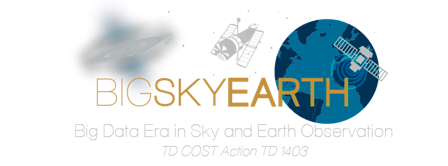

In [2]:
IPython.display.Image('bselogo.png')

--------
April 4

# Open Source tools
<mquartulli@vicomtech.org>

We try to build on the

    JPL-Caltech Virtual Summer School
    Big Data Analytics
    September 2-12 2014

available on Coursera.
Please go through

    Ashish Mahabal 
    California Institute of Technology
    "Best Programming Practices"

for an introduction to best practices in programming and for an introduction to Python and R.

In this material, we go into the Python "data science" stack, then introduce Apache Spark.

# Part 1: the PyData stack

A series of libraries for data management and analysis:

* pydata — data analytics
    <http://pydata.org/downloads/>
* rasterio — raster data access
     <https://github.com/mapbox/rasterio>
* fiona — vector data access
    <http://toblerity.org/fiona/manual.html>
* skimage — image processing
    <http://scikit-image.org/>
* sklearn — machine learning
    <http://scikit-learn.org/stable/>
* pandas — data analysis
    <http://pandas.pydata.org/>
* PIL — imaging
    <http://www.pythonware.com/products/pil/>
* Scipy — scientific computing library
    <http://scipy.org/>
* Numpy - array data types
    <http://numpy.org/>

# `numpy`: array data types

__What it does__: ND array data types allow operations to be described in terms of matrices and vectors.

__This is good because__: 
It makes code both cleaner and more efficient, since it translates to fewer lower-level calls to compiled routines, avoiding `for` loops.

In [51]:
import numpy as np

In [52]:
a = np.eye(5)

In [55]:
a

array([[ 1.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  0.,  1.]])

In [69]:
list("Oberpfaffenhofen")[::2]

['O', 'e', 'p', 'a', 'f', 'n', 'o', 'e']

In [59]:
a[2:4,:3] 

array([[ 0.,  0.,  1.],
       [ 0.,  0.,  0.]])

In [7]:
a[0,3:5]

array([ 0.,  0.])

In [8]:
a[4:,4:]

array([[ 1.]])

In [70]:
a[:,2]

array([ 0.,  0.,  1.,  0.,  0.])

In [71]:
a.shape

(5, 5)

In [76]:
a.reshape((-1))

array([ 1.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  1.,
        0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  1.])

# `matplotlib.pylab`: plotting in 2D and 3D

__What it does__: It allows producing visual representations of the data.

__This is good because__: It can help generate insights, communicate results, rapidly validate procedures 

In [11]:
%matplotlib inline

In [12]:
import matplotlib.pylab as plt

<matplotlib.colorbar.Colorbar instance at 0x112c67830>

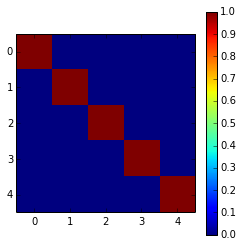

In [14]:
plt.figure(figsize=(4,4))
plt.imshow(a, interpolation='nearest')
plt.colorbar()

(0, 2)

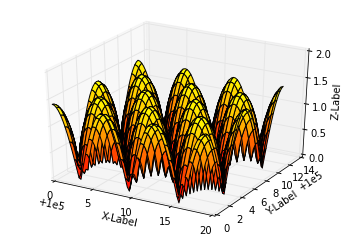

In [16]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()
ax = fig.gca(projection='3d')
X, Y = np.mgrid[0:6*np.pi:0.25, 0:4*np.pi:0.25]
Z = np.sqrt(np.abs(np.cos(X) + np.cos(Y)))

surf = ax.plot_surface(X + 1e5, Y + 1e5, Z, cmap='autumn', cstride=2, rstride=2)
ax.set_xlabel("X-Label")
ax.set_ylabel("Y-Label")
ax.set_zlabel("Z-Label")
ax.set_zlim(0, 2)

See the Matplotlib gallery at <http://matplotlib.org/gallery>

# `skimage`: basic image processing

A library of standard image processing methods.

It operates on `numpy` arrays.

In [17]:
import skimage.io

In [18]:
img = skimage.io.imread('lasvegas_Screen Shot 2013-12-05 at 12.42.02 PM.png')

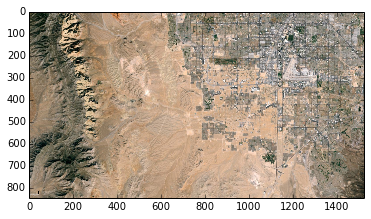

In [19]:
plt.imshow(img)

## `skimage.color`: color space transformations

In [20]:
import skimage.color

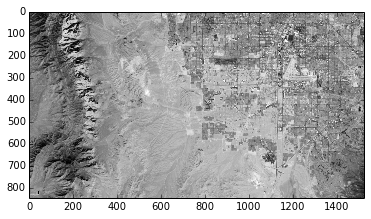

In [21]:
plt.imshow(skimage.color.rgb2gray(img), cmap='gray')

### `skimage.exposure`: histogram manipulation

In [22]:
import skimage.exposure

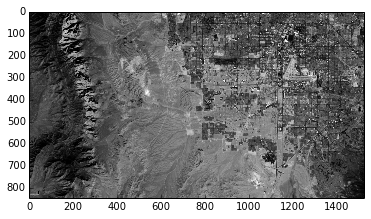

In [23]:
plt.imshow(skimage.exposure.adjust_gamma(skimage.color.rgb2gray(img), gamma=2, gain=1.3), cmap='gray')

# `sklearn`: machine learning

A library for clustering, classification, regression, e.g. for basic thematic mapping.

Plus: data transformation, ML performance evaluation...

See the ML lessons in the `JPL-Caltech Virtual Summer School` material.

In [24]:
import sklearn.cluster

In [25]:
km4 = sklearn.cluster.KMeans(n_clusters=4)

In [26]:
img[::2,::2,:].shape

(424, 762, 3)

In [27]:
img[::2,::2,:].reshape(-1, 3).shape

(323088, 3)

In [28]:
img4 = km4.fit_predict(img[::2,::2,:].reshape(-1,3)).reshape((424,762,1))

<matplotlib.colorbar.Colorbar instance at 0x1183f6560>

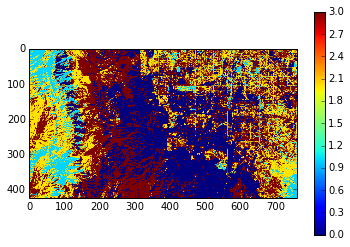

In [29]:
plt.imshow(img4[:,:,0])
plt.colorbar()

# `rasterio`, `fiona`: raster and vector data handling

Higher-level, Object-oriented interfaces to GDAL, OGR.

Allows accessing and transforming remote sensing imagery and maps.

Example 1. read ER Mapper "ERS" format, transform RGB to XYZ, display geocoded image

<type 'numpy.ndarray'>
BoundingBox(left=-1.9999018083507, bottom=43.313517039538546, right=-1.9847263720436985, top=43.324596748485)
(3, (4120, 5643))
ERS
{'init': u'epsg:4326'}


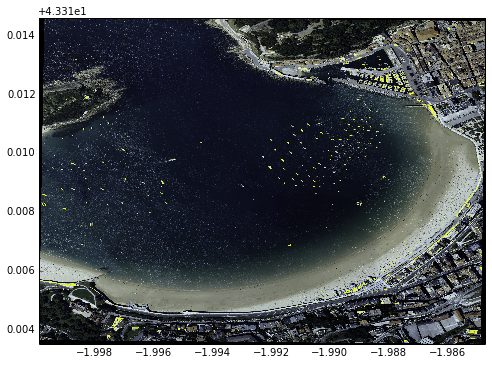

In [31]:
fn = "~/Data/all_donosti_croped_16_wgs4326_b.ers"
import rasterio, numpy, os.path
with rasterio.drivers(CPL_DEBUG=True):
    with rasterio.open(os.path.expanduser(fn)) as src:
        bands = map(src.read_band, (1, 2, 3))
        data = numpy.dstack(bands)
        print(type(data))
        print(src.bounds)
        print(src.count, src.shape)
        print(src.driver)
        print(str(src.crs))
        bounds = src.bounds[::2] + src.bounds[1::2]
import skimage.color
import matplotlib.pylab as plt
data_hsv = skimage.color.rgb2xyz(data)
fig = plt.figure(figsize=(8, 8))
ax = plt.imshow(data_hsv, extent=bounds)
plt.show()

Example 2. Binary masking by Shapefiles

In [ ]:
import shapefile, os.path
from PIL import Image, ImageDraw
sf = shapefile.Reader(os.path.expanduser("~/masking_shapes.shp"))
shapes, src_bbox = sf.shapes(), [ bounds[i] for i in [0, 2, 1, 3] ]
# Geographic x & y image sizes
xdist, ydist = src_bbox[2] - src_bbox[0], src_bbox[3] - src_bbox[1]
# Image width & height
iwidth, iheight = feats.shape[1], feats.shape[0]
xratio, yratio = iwidth/xdist, iheight/ydist
# Masking
mask = Image.new("RGB", (iwidth, iheight), "black")
draw = ImageDraw.Draw(mask)
pixels = { label:[] for label in labels }
for i_shape, shape in enumerate(sf.shapes()):
   draw.polygon([ p[:2] for p in pixels[label] ], 
                          outline="rgb(1, 1, 1)", 
                          fill="rgb(1, 1, 1)”)
import scipy.misc
fig = plt.figure(figsize=(8, 8))
ax = plt.imshow(scipy.misc.fromimage(mask)*data, extent=bounds)

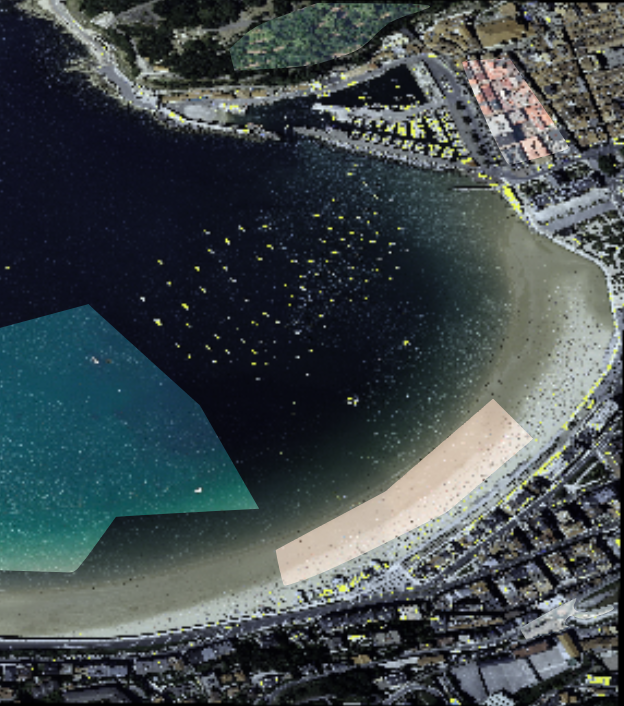

In [28]:
IPython.display.Image('masked.png')

## `pandas`: data management and analysis

Adds labels to `numpy` arrays. 

Mimicks R's DataFrame type, integrates plotting and data analysis.

In [1]:
import pandas

In [2]:
img4_df = pandas.DataFrame(img4.reshape(-1))

NameError: name 'img4' is not defined

In [34]:
img_df = pandas.DataFrame(img[::2,::2,:].reshape(-1,3))
img_df.columns = ['r','g','b']

In [35]:
img_df['label'] = pandas.DataFrame(img4.reshape(-1))

In [36]:
img_df.head()

,r,g,b,label
0,0.498039,0.450980,0.337255,2
1,0.403922,0.376471,0.258824,2
2,0.294118,0.294118,0.196078,1
3,0.290196,0.301961,0.227451,1
4,0.223529,0.247059,0.176471,1


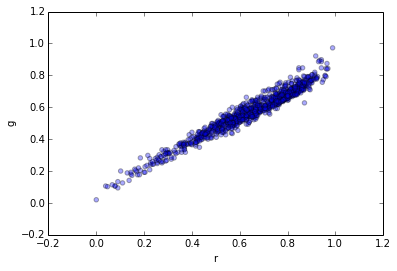

In [38]:
img_df.sample(n=1000).plot(x='r',y='g',alpha=1/3.,kind='scatter')

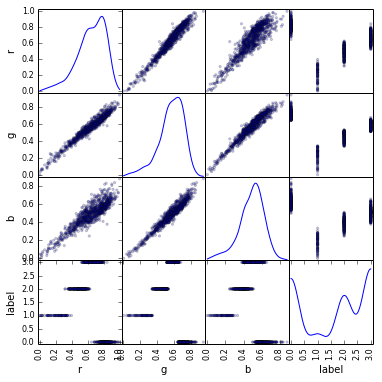

In [41]:
from pandas.tools.plotting import scatter_matrix

_ = scatter_matrix(img_df.sample(n=1000), alpha=0.2, figsize=(6, 6), diagonal='kde')

Exercise: add color, better statistics-oriented graphing

## Jupyter: an interactive development and documentation environment

Write and maintain documents that include text, diagrams and code.

Documents are rendered as HTML by GitHub.

In [77]:
import this

The Zen of Python, by Tim Peters

Beautiful is better than ugly.
Explicit is better than implicit.
Simple is better than complex.
Complex is better than complicated.
Flat is better than nested.
Sparse is better than dense.
Readability counts.
Special cases aren't special enough to break the rules.
Although practicality beats purity.
Errors should never pass silently.
Unless explicitly silenced.
In the face of ambiguity, refuse the temptation to guess.
There should be one-- and preferably only one --obvious way to do it.
Although that way may not be obvious at first unless you're Dutch.
Now is better than never.
Although never is often better than *right* now.
If the implementation is hard to explain, it's a bad idea.
If the implementation is easy to explain, it may be a good idea.
Namespaces are one honking great idea -- let's do more of those!


In [43]:
!ls -l

total 40768
-rw-r--r--  1 marcoq  staff   2632033 Apr  4 11:14 04_open_source_tools.ipynb
-rw-r--r--@ 1 marcoq  staff      1939 May 23  2015 README.md
lrwxr-xr-x  1 marcoq  staff        59 Apr  3 18:36 all_donosti_cropped_wgs4326.tif -> /Users/marcoq/Data/donostia/all_donosti_cropped_wgs4326.tif
-rw-r--r--@ 1 marcoq  staff     58495 Apr  4 07:24 bselogo.png
lrwxr-xr-x  1 marcoq  staff        69 Apr  3 18:37 lasvegas_Screen Shot 2013-12-05 at 12.42.02 PM.png -> /Users/marcoq/Data/lasvegas_Screen Shot 2013-12-05 at 12.42.02 PM.png
-rw-r--r--@ 1 marcoq  staff    865588 Apr  4 07:43 masked.png
-rw-r--r--  1 marcoq  staff  17232232 Apr  3 19:15 pivottablejs.html
-rw-------  1 marcoq  staff     23680 May 23  2015 pyspark-tutorial-1.ipynb
-rw-------  1 marcoq  staff     31242 May 23  2015 pyspark-tutorial-2.ipynb
-rw-r--r--  1 marcoq  staff        38 Apr  4 11:10 telemetry.csv


In [78]:
import math
math.sin?

In [79]:
import IPython.display
IPython.display.IFrame(src='http://github.com/', width=300, height=200)

## Jupyter interactive widgets

Rapidly develop simple interactive User Interfaces.

Good for experimentation and exploratory data analysis.

In [49]:
import pivottablejs
pivottablejs.pivot_ui(img_df.sample(n=100))

# Part 2: cluster computing

## The Apache Spark cluster computing framework

Distribute computation across a computing cluster.

In [82]:
!ls -l /usr/local/spark-1.2.0-bin-hadoop2.4/

total 160
-rw-r--r--@  1 marcoq  wheel  45242 Dec 10  2014 LICENSE
-rw-r--r--@  1 marcoq  wheel  22559 Dec 10  2014 NOTICE
-rw-r--r--@  1 marcoq  wheel   3645 Dec 10  2014 README.md
-rw-r--r--@  1 marcoq  wheel     35 Dec 10  2014 RELEASE
drwxr-xr-x@ 24 marcoq  wheel    816 Dec 10  2014 bin
drwxr-xr-x@  8 marcoq  wheel    272 Dec 10  2014 conf
drwxr-xr-x@  3 marcoq  wheel    102 Dec 10  2014 data
drwxr-xr-x@  7 marcoq  wheel    238 Dec 10  2014 ec2
drwxr-xr-x@  3 marcoq  wheel    102 Dec 10  2014 examples
drwxr-xr-x@  8 marcoq  wheel    272 Dec 10  2014 lib
drwxr-xr-x@ 10 marcoq  wheel    340 Oct 11 12:14 python
drwxr-xr-x@ 18 marcoq  wheel    612 Dec 10  2014 sbin


In [2]:
import os
os.environ['SPARK_HOME'] = '/usr/local/spark-1.2.0-bin-hadoop2.4/'
import sparklingpandas.utils
sparklingpandas.utils.add_pyspark_path()

In [3]:
import pyspark

# The Spark context

Where is the cluster?
What is the IP of the managing node?


In [10]:
conf = pyspark.conf.SparkConf()
conf.setAppName(__name__)

# this is really IMPORTANT:
# configure this in order to really distribute processing
# across all cluster 
# instead of central processing node only
if False:
    conf.setMaster(cluster_url)
conf.set('spark.eventLog.enabled', "true")

if not sc:
    sc = pyspark.SparkContext(conf=conf)
# sc.addFile("mymodule.pyc")
# sc.addFile("query.json")
# sc.addFile("MassiveCalculations.lin")

In [11]:
sc.defaultParallelism, sc.defaultMinPartitions

(4, 2)

# The Spark RDD


* `python` has the list, the dict, the set...
* `numpy` has the array
* `pandas` has the DataFrame...
* `spark` has the RDD

Who can instantiate an RDD? The cluster (the SparkContext)!

How do you create one?

* from a list or a dict
* from a numpy array
* from a DataFrame
* from a file
* from a DB
...

In [12]:
a_python_list = [ 1,2,3,4,5,6,7,8,9 ]

In [13]:
a_python_list_rdd = sc.parallelize(a_python_list, numSlices=sc.defaultParallelism)

Optional parameter `numSlices` helps define the number of chunks. 

Each chunk goes to a different processor...

In [14]:
a_python_list_rdd

ParallelCollectionRDD[0] at parallelize at PythonRDD.scala:364

How many elements does it contain?

In [15]:
assert len(a_python_list) == a_python_list_rdd.count()

In [16]:
a_python_list_rdd.first()

1

In [17]:
a_python_list_rdd.take(4)

[1, 2, 3, 4]

# Sampling in `spark`

In [18]:
a_python_list_rdd.takeSample(withReplacement=True, num=20)

[8, 3, 5, 2, 4, 8, 1, 5, 4, 3, 6, 3, 1, 4, 8, 2, 2, 1, 2, 5]

In [19]:
a_python_list_rdd.takeSample(withReplacement=False, num=20)

[4, 7, 6, 9, 1, 2, 8, 3, 5]

# mapreduce in `python`

In [20]:
def a_mapper_function(x): return 10*x+2

In [21]:
a_mapper_function(2)

22

In [22]:
def a_reducer_function(x,y): return x+y*3

In [23]:
reduce(a_reducer_function, [1,2,3,4,5])

43

With nameless functions:

In [24]:
a_second_mapper_function = (lambda x:10*x+2)

Syntax:

    lambda (input variables):(output variable)

In [25]:
a_second_mapper_function(2)

22

In [26]:
(lambda x:10*x+2)(2)

22

In [27]:
map(lambda x:3*x+x/2+x**3.14, [1,2,3,4,5])

[4.0,
 15.815240927012887,
 41.48913565245495,
 91.708472601283,
 173.59064522818883]

In [28]:
reduce(lambda a,b:a/(0.1*b), [1,2,3])

16.666666666666664

How does it work?

* a=1, b=2 --> a/(0.1*b)
* new_a=(a/0.1*b), new_b=3 --> ((a/(0.1*b))/(0.1*nuevo_b))

In [29]:
(1/(0.1*2))/(0.1*3)

16.666666666666664

...it would be great to be able to run `map` and `reduce` operations when data is distributed in a cluster...

# mapreduce in `spark`

In [32]:
a_python_list_rdd.map(lambda x: x*x).take(9)

[1, 4, 9, 16, 25, 36, 49, 64, 81]

In [33]:
a_python_list_rdd.map(lambda x: ("a_key", x*x)).reduceByKey(lambda x,y:x+y).take(1)

[('a_key', 285)]

In [34]:
a_python_list_rdd.map(lambda x: x*x).reduce(lambda x,y:x+y)

285

In [140]:
reduce(lambda x,y:x+y, [1, 4, 9, 16, 25, 36, 49, 64, 81])

285

# The Hadoop Distributed File System

Distributes and manages for redundancy very large data files on the cluster disks.

Achille's heel: managing very large numbers of small files.

In [ ]:
# if not available, copy data from AWS S3 cloud storage to cluster FS
if not os.path.exists(debts_fn):
  def reporter(n,N):
    print n, "/", N    
  bucket = boto.connect_s3().get_bucket('mquartulli_almis_benchmarks')
  kk = boto.s3.key.Key(bucket)
  kk.key = debts_fn
  kk.get_contents_to_filename(debts_fn, num_cb=300, cb=reporter)
  telemetry.write('dataload; %s; %s\n' % (debts_fn, datetime.datetime.now().isoformat()))
  telemetry.flush()
# copy data from cluster FS to HDFS accessible to spark on worker nodes via ./ephemeral-hdfs/bin/hadoop
hdfs_debts_fn = os.path.join('/data/', debts_fn)
hdfs_out_fn   = os.path.join('/data/', out_fn)

try:
  subprocess.check_call(["./ephemeral-hdfs/bin/hadoop", "fs", "-mkdir", "/data"])
  subprocess.check_call(["./ephemeral-hdfs/bin/hadoop", "fs", "-put", debts_fn, "/data/"])
  subprocess.check_call(["./ephemeral-hdfs/bin/hadoop", "fs", "-ls", "/data"])
  telemetry.write('hdfs_put; %s; %s\n' % (debts_fn, datetime.datetime.now().isoformat()))
except subprocess.CalledProcessError:
  print "hdfs /data already exists - skipping"

telemetry.write('hdfs_debts_fn; %s; %s\n' % (hdfs_debts_fn, datetime.datetime.now().isoformat()))
telemetry.write('hdfs_out_fn; %s; %s\n' %   (hdfs_out_fn, datetime.datetime.now().isoformat()))
telemetry.flush()


# An RDD from a data file

In [35]:
!ls ~/Data/*txt

/Users/marcoq/Data/cino_da_pistoia.txt  /Users/marcoq/Data/stock2.txt
/Users/marcoq/Data/dante_canzoniere.txt /Users/marcoq/Data/yahoo_license.txt
/Users/marcoq/Data/dog_urls.txt


In [36]:
sc.textFile('/Users/marcoq/Data/stock2.txt').take(5)

[u'symbol,date,price',
 u'S&P 500,2000,1394.46',
 u'S&P 500,2000,1366.42',
 u'S&P 500,2000,1498.58',
 u'S&P 500,2000,1452.43']

In [37]:
sc.textFile('/Users/marcoq/Data/stock2.txt').count()

807

## Data filtering

In [38]:
header = sc.textFile('/Users/marcoq/Data/stock2.txt').take(1)[0]

NOTE: `take(1)` returns array `[ first_element ]`

In [39]:
rows = sc.textFile('/Users/marcoq/Data/stock2.txt').filter(lambda line: line != header)
rows.take(5)

[u'S&P 500,2000,1394.46',
 u'S&P 500,2000,1366.42',
 u'S&P 500,2000,1498.58',
 u'S&P 500,2000,1452.43',
 u'S&P 500,2000,1420.6']

In [40]:
valid_lines_rdd = sc.textFile('/Users/marcoq/Data/stock2.txt')\
  .filter(lambda line: line != header)
valid_lines_rdd.take(5)

[u'S&P 500,2000,1394.46',
 u'S&P 500,2000,1366.42',
 u'S&P 500,2000,1498.58',
 u'S&P 500,2000,1452.43',
 u'S&P 500,2000,1420.6']

## Caching (writing to HDFS)

Hadoop typically stores intermediates to disk.

Spark does it on demand.

In [41]:
valid_lines_rdd = valid_lines_rdd.cache()

## Max values based on key

In [42]:
valid_lines_rdd\
    .map(lambda line: (line.split(',')[0], float(line.split(',')[2])) )\
    .take(5)

[(u'S&P 500', 1394.46),
 (u'S&P 500', 1366.42),
 (u'S&P 500', 1498.58),
 (u'S&P 500', 1452.43),
 (u'S&P 500', 1420.6)]

In [43]:
valid_lines_rdd\
  .map(lambda line: (line.split(',')[0], 
                     float(line.split(',')[2])))\
  .reduceByKey(lambda x,y:max(x,y)).take(10)

[(u'GOOG', 707.0),
 (u'AMZN', 135.91),
 (u'AAPL', 223.02),
 (u'MSFT', 43.22),
 (u'10 Year T-Note', 6.67),
 (u'IBM', 130.32),
 (u'S&P 500', 1549.38)]

With named functions:

In [44]:
def f1(x,y):
    return x+y
    
valid_lines_rdd\
  .map(lambda line:(line.split(',')[0], float(line.split(',')[2])))\
  .reduceByKey(f1).take(10)

[(u'GOOG', 28279.18999999999),
 (u'AMZN', 5902.409999999999),
 (u'AAPL', 7961.850000000001),
 (u'MSFT', 3042.6200000000017),
 (u'10 Year T-Note', 541.4499999999999),
 (u'IBM', 11225.130000000001),
 (u'S&P 500', 145685.32000000007)]

Note:

* the key is the first tuple elements
* the value is the second one

Exercise:

* manage an image as `[ ((x,y), pixel_value),...]`

See <https://github.com/freeman-lab/thunder/> 

# Telemetry

The central element for optimising the analysis system.

From "If it moves we track it" to Design Of Experiments.

In [49]:
import datetime

# start telemetry / metrics / analytics file
telemetry = open('telemetry.csv','a')
telemetry.write('t_operation; t_args; n_time_microsecs\n')
telemetry.write('new_run; none; %s\n' % datetime.datetime.now().isoformat())
telemetry.flush()

# PySpark example: MLLib

In [ ]:
from pyspark.mllib.clustering import KMeans, KMeansModel
from numpy import array
from math import sqrt

# Load and parse the data
data = sc.textFile("data/mllib/kmeans_data.txt")
parsedData = data.map(lambda line: array([float(x) for x in line.split(' ')]))

# Build the model (cluster the data)
clusters = KMeans.train(parsedData, 2, maxIterations=10,
        runs=10, initializationMode="random")

# Evaluate clustering by computing Within Set Sum of Squared Errors
def error(point):
    center = clusters.centers[clusters.predict(point)]
    return sqrt(sum([x**2 for x in (point - center)]))

WSSSE = parsedData.map(lambda point: error(point)).reduce(lambda x, y: x + y)
print("Within Set Sum of Squared Error = " + str(WSSSE))

# Save and load model
clusters.save(sc, "myModelPath")
sameModel = KMeansModel.load(sc, "myModelPath")

# PySpark streaming

In [ ]:
from pyspark.mllib.linalg import Vectors
from pyspark.mllib.regression import LabeledPoint
from pyspark.mllib.clustering import StreamingKMeans
def parse(lp):
    label = float(lp[lp.find('(') + 1: lp.find(',')])
    vec = Vectors.dense(lp[lp.find('[') + 1: lp.find(']')].split(','))
    return LabeledPoint(label, vec)
trainingData = ssc.textFileStream("/training/data/dir").map(Vectors.parse)
testData = ssc.textFileStream(“/testing/data/dir").map(parse)
model = StreamingKMeans(k=2, decayFactor=1.0).setRandomCenters(3, 1.0, 0)
model.trainOn(trainingData)
print(model.predictOnValues(testData.map(lambda lp: (lp.label, lp.features))))
ssc.start()
ssc.awaitTermination()

# Instantiation on external infrastructures - AWS